In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

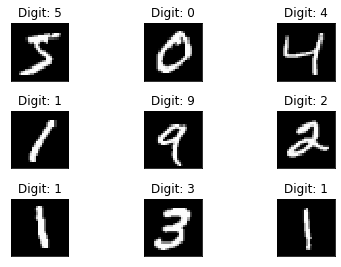

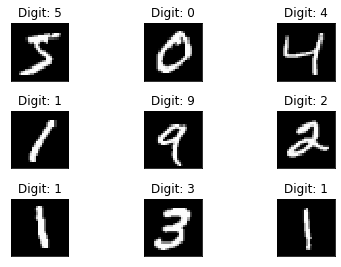

In [37]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

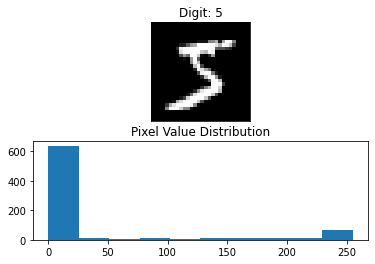

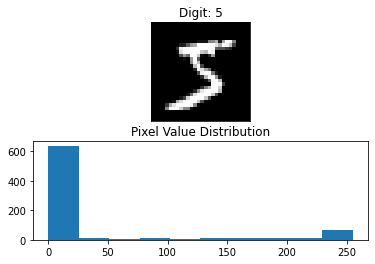

In [38]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

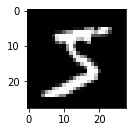

In [0]:
plt.subplot(221)
plt.imshow(X_train[0],cmap=plt.get_cmap("gray"))
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [0]:
#Baseline Model
#Flatten 28*28 images to 784 vector for each image
num_pix = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],num_pix).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pix).astype('float32')

In [0]:
#Normalize the input
X_train = X_train/255
X_test = X_test/255

In [0]:
#One-hot encoded output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [43]:
#num_class = y_test.shape[1]
num_class
num_pix

784

In [0]:
#Define the Baseline
model = Sequential()
model.add(Dense(512,input_shape=(784,),kernel_initializer="normal",activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(num_class,kernel_initializer = "normal",activation="softmax"))

In [0]:
#Compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [0]:
#Model evaluation
scores = model.evaluate(X_test,y_test,verbose=0)

In [0]:
#print the accuracy
print("accuracy",(100-scores[1]*100))

accuracy 89.9899996817112


In [0]:
#training the model
history = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 0.2204 - accuracy: 0.9359 - val_loss: 0.1082 - val_accuracy: 0.9669
Epoch 2/20
 - 8s - loss: 0.0777 - accuracy: 0.9761 - val_loss: 0.0783 - val_accuracy: 0.9773
Epoch 3/20
 - 8s - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0731 - val_accuracy: 0.9761
Epoch 4/20
 - 8s - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0631 - val_accuracy: 0.9813
Epoch 5/20
 - 8s - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0709 - val_accuracy: 0.9798
Epoch 6/20
 - 7s - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0788 - val_accuracy: 0.9777
Epoch 7/20
 - 8s - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0802 - val_accuracy: 0.9795
Epoch 8/20
 - 8s - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0937 - val_accuracy: 0.9770
Epoch 9/20
 - 8s - loss: 0.0143 - accuracy: 0.9953 - val_loss: 0.0988 - val_accuracy: 0.9771
Epoch 10/20
 - 8s - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0818 - val_accuracy: 0.9815
Epoch 11/20
 - 8s -

In [0]:
#Model evaluation
scores = model.evaluate(X_test,y_test,verbose=0)
#print the accuracy
print("accuracy:",scores[1])
#Print the test loss
print("test_loss:",scores[0])

accuracy: 0.9815999865531921
test_loss: 0.10003051379374306


In [0]:
#Flatten: Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. Dense adds the fully connected layer to the neural network
#Explanation: https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras

In [0]:
#Adding more flavours
#Reduce Overfitting by introducing Dropout layer
#Increase the model depth
#Define the Baseline
model = Sequential()
model.add(Dense(256,input_shape=(784,),kernel_initializer="normal",activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_class,kernel_initializer = "normal",activation="softmax"))

In [0]:
#Compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [48]:
#training the model
history = model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.3525 - accuracy: 0.8911 - val_loss: 0.1399 - val_accuracy: 0.9592
Epoch 2/20
 - 7s - loss: 0.1448 - accuracy: 0.9567 - val_loss: 0.1010 - val_accuracy: 0.9708
Epoch 3/20
 - 7s - loss: 0.1058 - accuracy: 0.9682 - val_loss: 0.0813 - val_accuracy: 0.9764
Epoch 4/20
 - 7s - loss: 0.0867 - accuracy: 0.9745 - val_loss: 0.0803 - val_accuracy: 0.9762
Epoch 5/20
 - 7s - loss: 0.0764 - accuracy: 0.9761 - val_loss: 0.0699 - val_accuracy: 0.9801
Epoch 6/20
 - 8s - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0682 - val_accuracy: 0.9818
Epoch 7/20
 - 9s - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0643 - val_accuracy: 0.9811
Epoch 8/20
 - 8s - loss: 0.0528 - accuracy: 0.9839 - val_loss: 0.0775 - val_accuracy: 0.9791
Epoch 9/20
 - 7s - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0759 - val_accuracy: 0.9805
Epoch 10/20
 - 7s - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0685 - val_accuracy: 0.9818
Epoch 11/20
 - 8s -

In [0]:
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

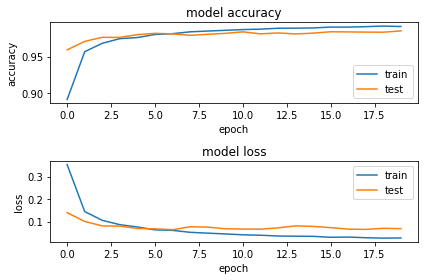

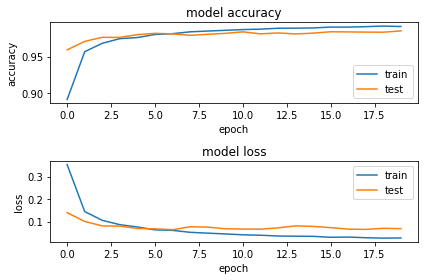

In [50]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [51]:
#Model Evaluation
#Model evaluation
scores = model.evaluate(X_test,y_test,verbose=0)
#print the accuracy
print("accuracy:",scores[1])
#Print the test loss
print("test_loss:",scores[0])

accuracy: 0.9851999878883362
test_loss: 0.068972940525387


In [52]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


0  classified correctly
1  classified incorrectly


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


In [53]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

<Figure size 504x1008 with 0 Axes>

In [0]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation